In [1]:
# Cell 1: Environment and paths
import sys
sys.path.append('..')

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.siamese_tracker import SiameseTracker
MODEL_PATH = '../siamfc-pytorch/siamfc_alexnet_e50.pth'
# Video path (kept consistent with other notebooks)

VIDEO_PATH_MUG = '../Test-Videos/Antoine_Mug.mp4'
VIDEO_PATH_BALL='../Test-Videos/VOT-ball.mp4'
VIDEO_PATH_BASKET = '../Test-Videos/VOT-Basket.mp4'
VIDEO_PATH_CAR='../Test-Videos/VOT-Car.mp4'
VIDEO_PATH_SUNSHADE='../Test-Videos/VOT-Sunshade.mp4'
VIDEO_PATH_WOMAN='../Test-Videos/VOT-Woman.mp4'

## Run SiamFC Prototype
The code below will interactively select an ROI on the first frame, then run tracking and optionally save results to `../results/q7_siamese`.

In [2]:
tracker = SiameseTracker(
    video_path=VIDEO_PATH_WOMAN, 
    net_path=MODEL_PATH,   # IMPORTANT: pass the model path
    device='cpu',  # change to 'cuda' if you have a GPU
    debug=False
)
# Save tracking results to ../results/q7_siamese and visualize
tracker.track_video(visualize=True, save_result=True, output_dir='../results/siamese/siamese_woman')

Loading pretrained SiamFC model...
✓ Pretrained Siamese network loaded!

=== ROI Selection ===
1. Drag to select the target
2. Press ENTER or SPACE to confirm
3. Press 'c' to cancel

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!

Initializing real Siamese network...
Results will be saved to: ../results/siamese/siamese_woman

🎯 Tracking with REAL Siamese Network (GOT-10k trained)
Press ESC to quit | Press 'p' to pause

📊 Frame 50 | Avg FPS: 18.3
📊 Frame 100 | Avg FPS: 18.5
📊 Frame 150 | Avg FPS: 17.9
📊 Frame 200 | Avg FPS: 17.4
📊 Frame 250 | Avg FPS: 18.4
📊 Frame 300 | Avg FPS: 18.4
📊 Frame 350 | Avg FPS: 17.9
📊 Frame 400 | Avg FPS: 18.0
📊 Frame 450 | Avg FPS: 18.6
📊 Frame 500 | Avg FPS: 18.3
📊 Frame 550 | Avg FPS: 18.7

✅ Tracking Completed!
Total frames processed: 597
Average FPS: 18.2
Results saved to: ../results/siamese/siamese_woman
Saved 597 frames and predictions.csv



## Visualization (example)
If you saved result frames, the code below will load several key frames and display them for comparison.

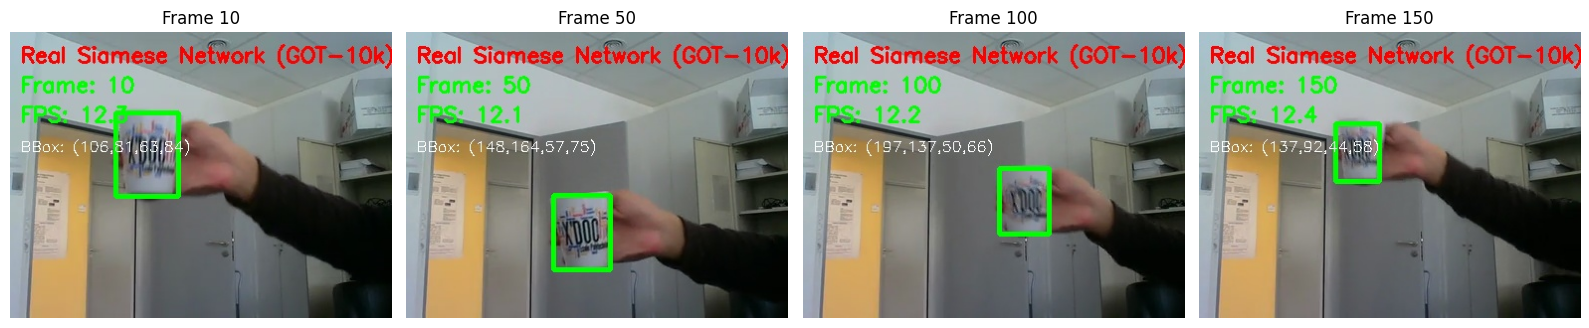

In [2]:
import os
from PIL import Image

out_dir = '../results/q7_siamese'
frame_nums = [10, 50, 100, 150]

# candidate filename patterns saved by trackers (both jpg/png and case variants)
patterns = [
    'frame_{:04d}.jpg', 'Frame_{:04d}.jpg',
    'frame_{:04d}.png', 'Frame_{:04d}.png'
]

fig, axes = plt.subplots(1, len(frame_nums), figsize=(16, 4))
for ax, n in zip(axes, frame_nums):
    found = False
    for p in patterns:
        path = os.path.join(out_dir, p.format(n))
        if os.path.exists(path):
            img = Image.open(path).convert('RGB')
            arr = np.array(img)  # PIL gives RGB order already
            ax.imshow(arr)
            ax.set_title(f'Frame {n}')
            ax.axis('off')
            found = True
            break
    if not found:
        ax.text(0.5, 0.5, 'Not found', ha='center', va='center')
        ax.axis('off')

plt.tight_layout()
plt.show()

## OSTrack

In [ ]:
import sys
sys.path.append('..')
from src.ostrack import OSTrack

tracker = OSTrack(
    video_path=VIDEO_PATH_WOMAN,
    config_name='vitb_256_mae_32x4_ep300',  
    device='cpu',                            
    debug=True
)

tracker.track_video(visualize=True, save_result=True, output_dir='../results/ostrack/ostrack_woman')


[OSTrack wrapper] Created EvalTracker(name='ostrack', param='vitb_256_mae_32x4_ep300', dataset='video_demo')
[OSTrack wrapper] Saving frame PNGs to: ../results/ostrack/ostrack_woman
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


2025-11-19 12:06:50.864 python[16368:7983795] error messaging the mach port for IMKCFRunLoopWakeUpReliable


[OSTrack wrapper] Using optional_box = (203.0, 119.0, 30.0, 103.0)
[OSTrack wrapper] cv2.imshow has been patched for frame saving.
test config:  {'MODEL': {'PRETRAIN_FILE': 'mae_pretrain_vit_base.pth', 'EXTRA_MERGER': False, 'RETURN_INTER': False, 'RETURN_STAGES': [], 'BACKBONE': {'TYPE': 'vit_base_patch16_224', 'STRIDE': 16, 'MID_PE': False, 'SEP_SEG': False, 'CAT_MODE': 'direct', 'MERGE_LAYER': 0, 'ADD_CLS_TOKEN': False, 'CLS_TOKEN_USE_MODE': 'ignore', 'CE_LOC': [], 'CE_KEEP_RATIO': [], 'CE_TEMPLATE_RANGE': 'ALL'}, 'HEAD': {'TYPE': 'CENTER', 'NUM_CHANNELS': 256}}, 'TRAIN': {'LR': 0.0004, 'WEIGHT_DECAY': 0.0001, 'EPOCH': 300, 'LR_DROP_EPOCH': 240, 'BATCH_SIZE': 32, 'NUM_WORKER': 10, 'OPTIMIZER': 'ADAMW', 'BACKBONE_MULTIPLIER': 0.1, 'GIOU_WEIGHT': 2.0, 'L1_WEIGHT': 5.0, 'FREEZE_LAYERS': [0], 'PRINT_INTERVAL': 50, 'VAL_EPOCH_INTERVAL': 20, 'GRAD_CLIP_NORM': 0.1, 'AMP': False, 'CE_START_EPOCH': 20, 'CE_WARM_EPOCH': 80, 'DROP_PATH_RATE': 0.1, 'SCHEDULER': {'TYPE': 'step', 'DECAY_RATE': 0.